In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter("ignore")

## Exploratory Data Analysis


(1259, 1)


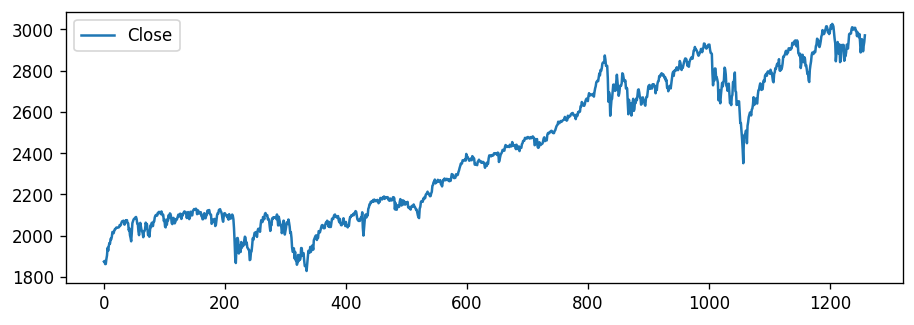

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter("ignore")
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

series = pd.read_csv('5_year_ S&P.csv', usecols=[4])
print(series.shape)
series.plot()
plt.show()

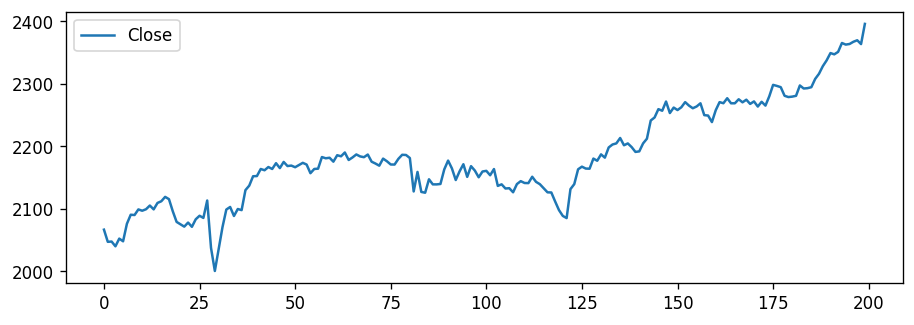

In [3]:
series = series.iloc[400:600]
series = series.reset_index(drop=True)
series=series.astype(float)
series.plot()
plt.show()

In [4]:
series.head()

,Close
0,2066.659912
1,2047.209961
2,2047.630005
3,2040.040039
4,2052.320068


In [5]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

## Test for Stationarity

The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then you reject the null hypothesis and infer that the time series is indeed stationary.

In [19]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(series.Close)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.195829
p-value: 0.939017


So, in our case, if P Value > 0.05 it means that the series is not stationary

## Finding the order of differencing (d) in ARIMA model


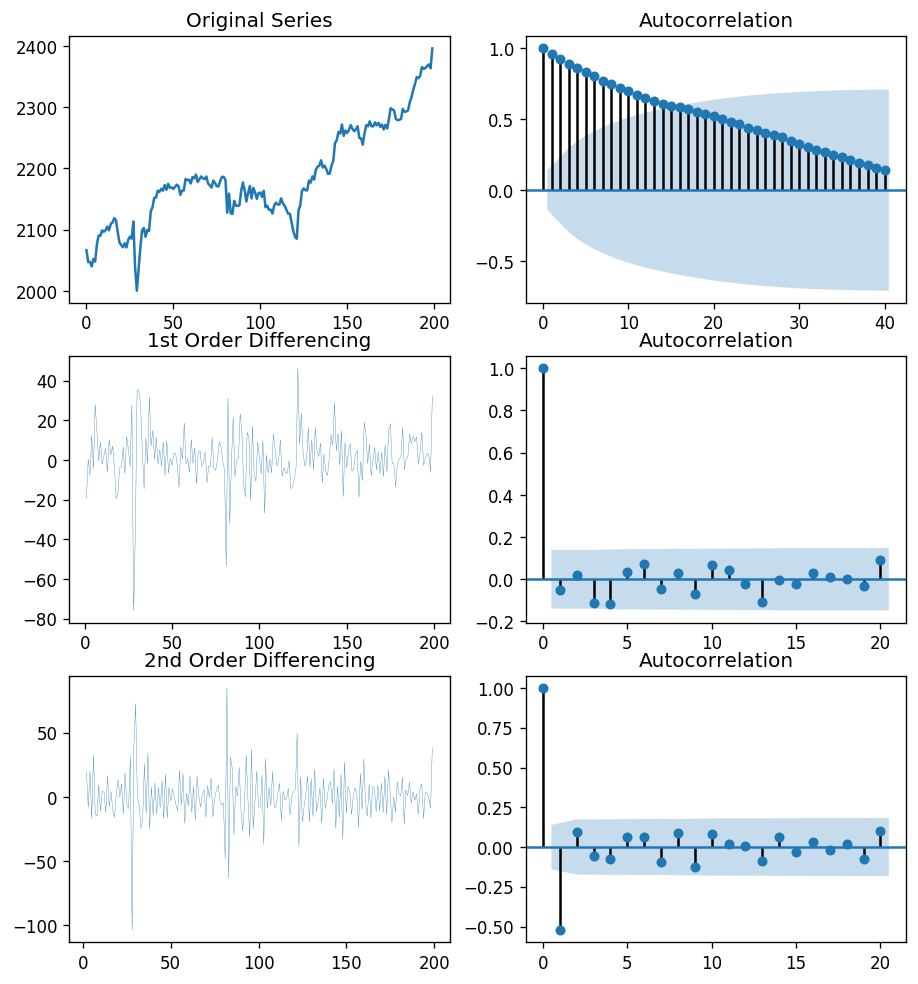

In [20]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,10), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2)
axes[0, 0].plot(series); axes[0, 0].set_title('Original Series')
plot_acf(series, ax=axes[0, 1], lags = 40)

# 1st Differencing
axes[1, 0].plot(series.diff(), linewidth = 0.2); axes[1, 0].set_title('1st Order Differencing')
plot_acf(series.diff().dropna(), ax=axes[1, 1], lags= 20)

# 2nd Differencing
axes[2, 0].plot(series.diff().diff(), linewidth = 0.2); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(series.diff().diff().dropna(), ax=axes[2, 1], lags= 20)

plt.show()

For the above series, the time series reaches stationarity with two orders of differencing.

## Finding the order of the MA term (q)

Using the ACF 

## Finding the order of the AR term (p)

Using the PACF

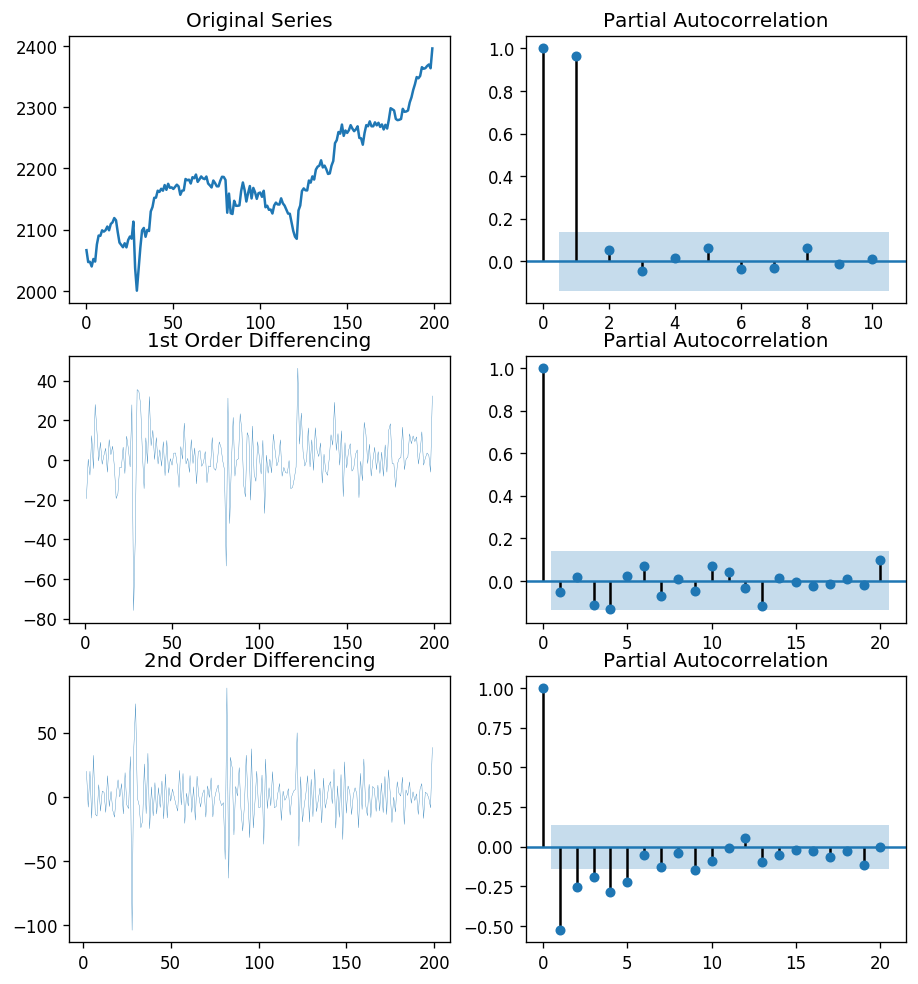

In [8]:
plt.rcParams.update({'figure.figsize':(9,10), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2)
axes[0, 0].plot(series); axes[0, 0].set_title('Original Series')
plot_pacf(series, ax=axes[0, 1], lags = 10)

# 1st Differencing
axes[1, 0].plot(series.diff(), linewidth = 0.2); axes[1, 0].set_title('1st Order Differencing')
plot_pacf(series.diff().dropna(), ax=axes[1, 1], lags= 20)

# 2nd Differencing
axes[2, 0].plot(series.diff().diff(), linewidth = 0.2); axes[2, 0].set_title('2nd Order Differencing')
plot_pacf(series.diff().diff().dropna(), ax=axes[2, 1], lags= 20)

plt.show()

In [9]:
plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':120})

# AR (1) model

/Users/yeeeeehan/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/yeeeeehan/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/yeeeeehan/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/yeeeeehan/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/yeeeeehan/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available


Test RMSE: 13.680
Test Percentage Error: 0.006%


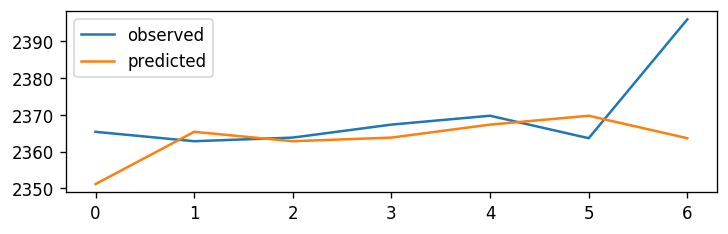

In [54]:
plt.rcParams.update({'figure.figsize':(7,2), 'figure.dpi':120})

# AR model
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
 
def predict(coef, history):
    yhat = 0.0
    for i in range(1, len(coef)+1):    # For each coef passed in
        yhat += coef[i-1] * history[-i]    # add the product of coef and historical value
    return yhat                        # Returns the sum of product
 
# series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0)
X = series.values
size = len(X) - 7
train, test = X[0:size], X[size:]    # Split into train and test set
history = [x for x in train]
predictions = []
for t in range(len(test)):    # To predict each test value
    model = ARIMA(history, order=(1,0,0))
    model_fit = model.fit(trend="nc", disp=False)    
    ar_coef = model_fit.arparams
    yhat = predict(ar_coef, history)
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('>predicted=%.3f, observed=%.3f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
pcterr = rmse/test.mean()
print('Test Percentage Error: %.3f%%' % pcterr)



predictions = np.vstack(predictions)
plt.plot(test, label='observed')
plt.plot(predictions, label='predicted')
plt.legend(loc='best')
plt.show()

## MA (1) model

Test RMSE: 2369.839
Test Percentage Error: 1.000%


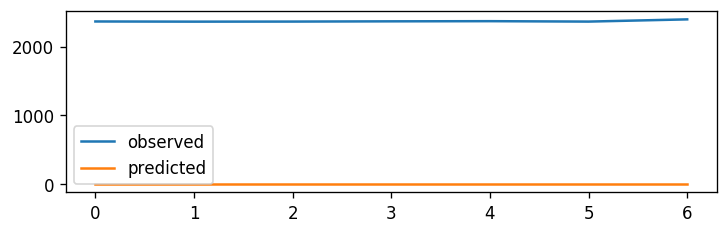

In [32]:
plt.rcParams.update({'figure.figsize':(7,2), 'figure.dpi':120})

# MA model
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
 
def predict(coef, history):
    yhat = 0.0
    for i in range(1, len(coef)+1):    # For each coef passed in
        yhat += coef[i-1] * history[-i]    # add the product of coef and historical value
    return yhat                        # Returns the sum of product
 
# series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0)
X = series.values
size = len(X) - 7
train, test = X[0:size], X[size:]    # Split into train and test set
history = [x for x in train]
predictions = []
for t in range(len(test)):    # To predict each test value
    model = ARIMA(history, order=(0,0,1))
    model_fit = model.fit(trend="nc", disp=False)    
    ar_coef = model_fit.arparams
    yhat = predict(ar_coef, history)
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('>predicted=%.3f, observed=%.3f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
pcterr = rmse/test.mean()
print('Test Percentage Error: %.3f%%' % pcterr)



predictions = np.vstack(predictions)
plt.plot(test, label='observed')
plt.plot(predictions, label='predicted')
plt.legend(loc='best')
plt.show()

## ARIMA (2,2,1) model

Test RMSE: 12.227
Test Percentage Error: 0.005%


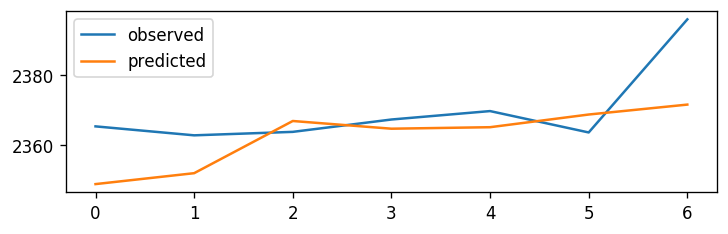

In [37]:
# ARIMA manual prediction function

from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy

def predict(coef, history):
    yhat = 0.0
    for i in range(1, len(coef)+1):
        yhat += coef[i-1] * history[-i]
    return yhat

def difference(dataset):
    diff = []
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i - 1]
        diff.append(value)
    return numpy.array(diff)

X = series.values
size = len(X) - 7
train, test = X[0:size], X[size:]
history = [x for x in train]
predictions = []
for t in range(len(test)):
    model = ARIMA(history, order=(2,2,1))
    model_fit = model.fit(trend='nc', disp=False)
    ar_coef, ma_coef = model_fit.arparams, model_fit.maparams
    resid = model_fit.resid
    diff = difference(history)
    yhat = history[-1] + predict(ar_coef, diff) + predict(ma_coef, resid)
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('>predicted=%.3f, expected=%.3f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
pcterr = rmse/test.mean()
print('Test Percentage Error: %.3f%%' % pcterr)

profit = 0

for t in range(len(test)-1):
    if predictions[t+1] > test[t]:  # Assume Long
        profit += test[t+1] - test[t]
        
    elif predictions[t+1] < test[t]:  # Assume Short
        profit += test[t] - test[t+1]
        
# print(profit)

predictions = np.vstack(predictions)
plt.plot(test, label='observed')
plt.plot(predictions, label='predicted')
plt.legend(loc='best')
plt.show()

## Multi-time step forecast

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  139
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -571.387
Method:                       css-mle   S.D. of innovations             14.655
Date:                Thu, 12 Dec 2019   AIC                           1150.774
Time:                        23:58:37   BIC                           1162.512
Sample:                             1   HQIC                          1155.544
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.7344      0.299      2.453      0.015       0.148       1.321
ar.L1.D.Close     0.9173      0.037     24.923      0.000       0.845       0.989
ma.L1.D.Close    -0.9999      0.022    -

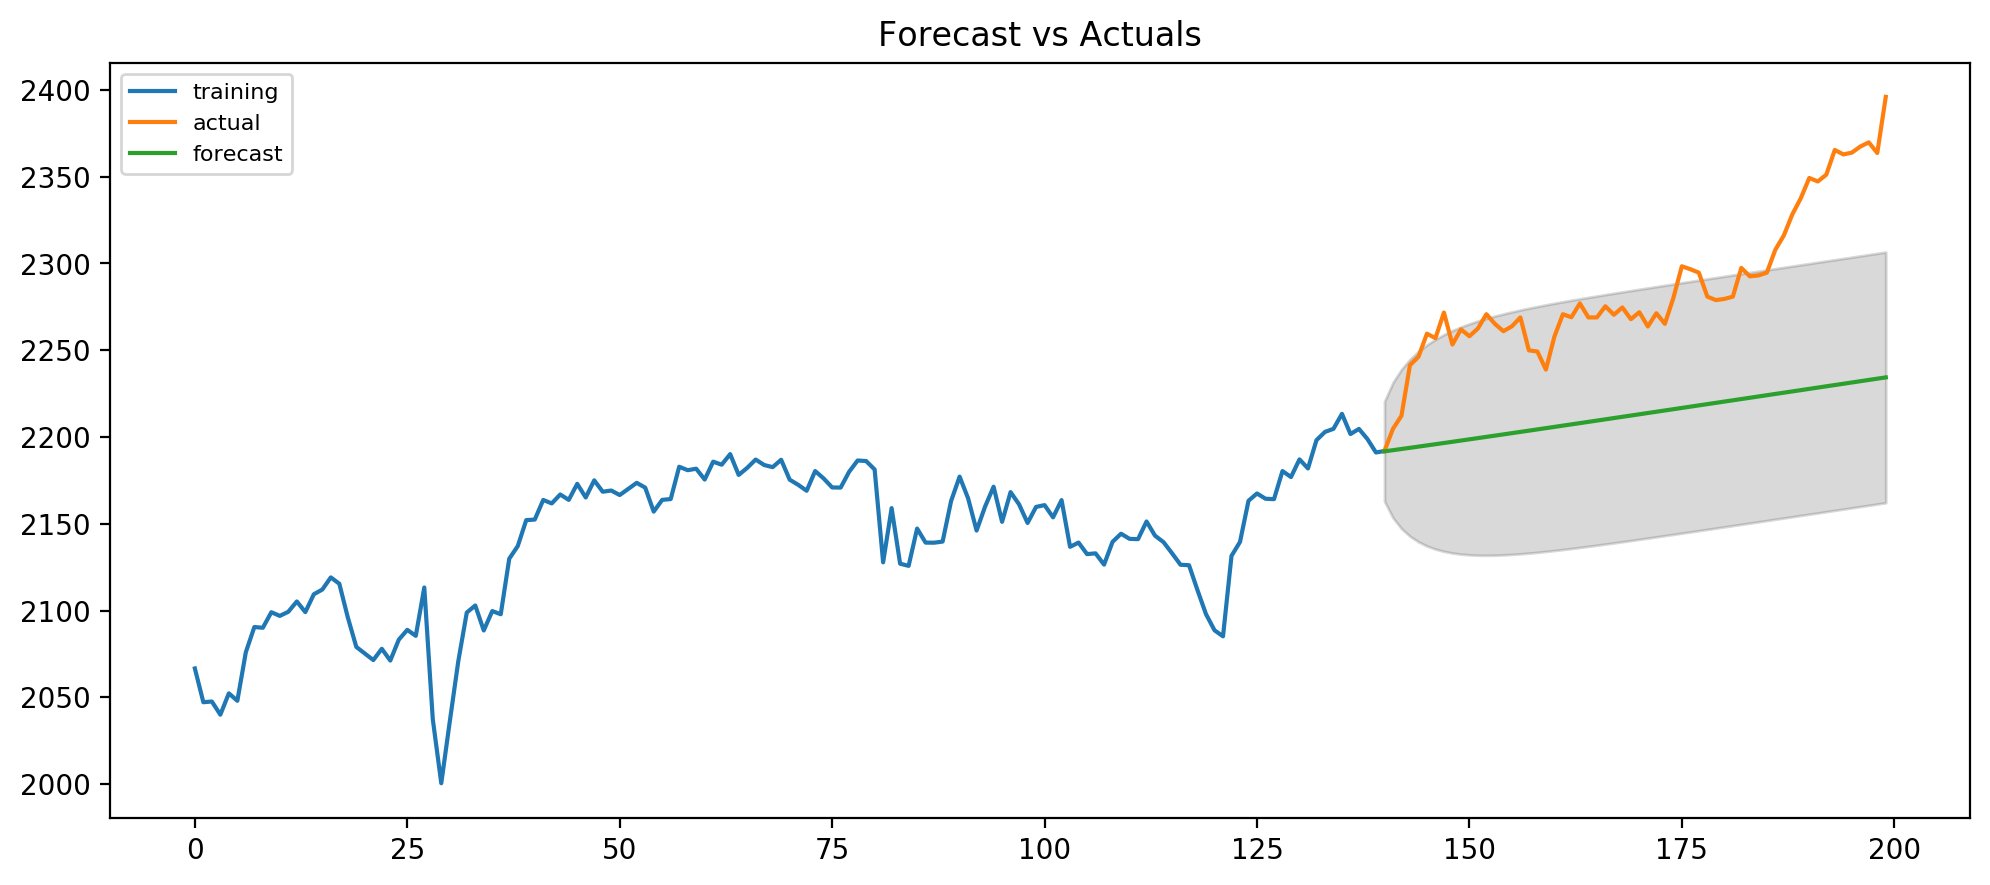

In [39]:
# Build Model
# plt.rcParams.update({'figure.figsize':(4.5,5), 'figure.dpi':200})



k = int(0.7*len(series))
train =series[:k]
test = series[k:]

model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(len(test), alpha=0.05)

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
# fc_series = np.exp(fc_series)
lower_series = pd.Series(conf[:, 0])
upper_series = pd.Series(conf[:, 1])

# Re-index


# Plot
plt.figure(figsize=(12,5), dpi=200)

plt.plot(series[:k+1], label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(test.index, lower_series, upper_series, color='k', alpha=.15)

plt.title('Forecast vs Actuals')
plt.legend(loc='best', fontsize=8)
plt.show()




In [14]:
rmse = sqrt(mean_squared_error(fc, test))
print('Test RMSE: %.3f' % rmse)
pcterr = rmse/test.mean()
print('Test Percentage Error: %.3f%%' % pcterr)

Test RMSE: 79.732
Test Percentage Error: 0.035%


                                 Statespace Model Results                                 
Dep. Variable:                              Close   No. Observations:                  140
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 27)   Log Likelihood                -351.024
Date:                            Fri, 13 Dec 2019   AIC                            712.048
Time:                                    00:10:24   BIC                            724.142
Sample:                                         0   HQIC                           716.907
                                            - 140                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6419      0.378     -1.697      0.090      -1.383       0.099
ma.L1          0.5078      0.463   

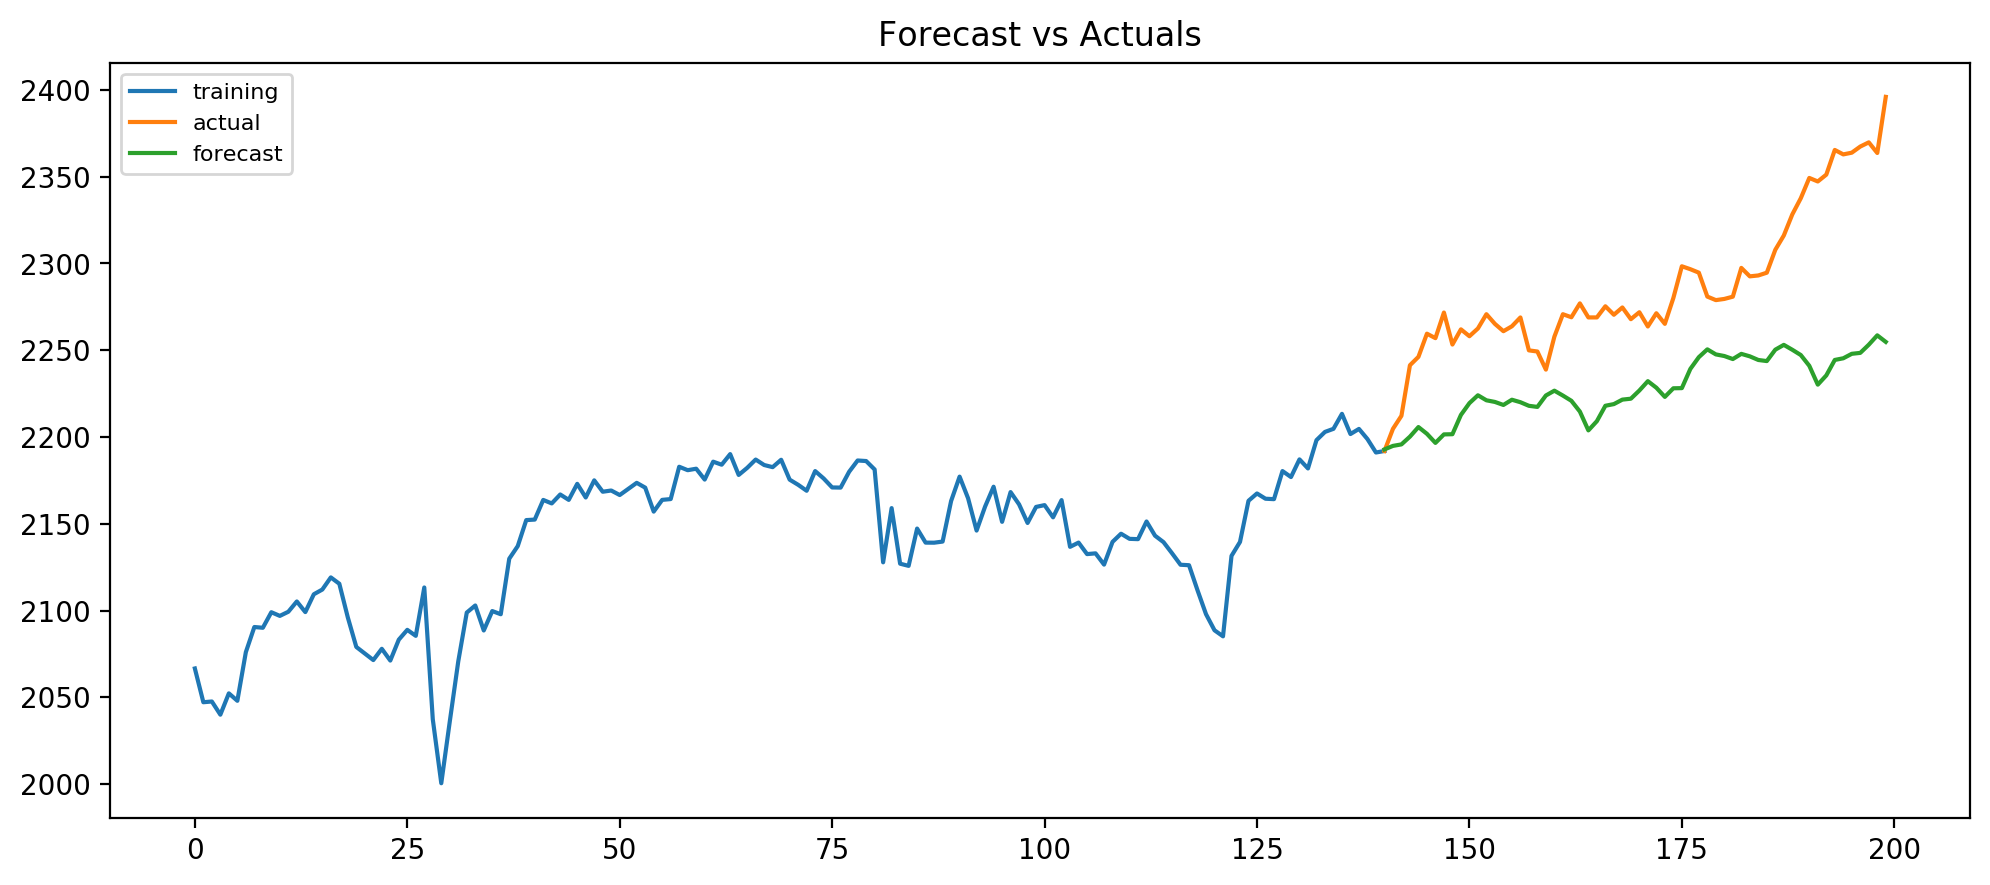

In [52]:
# Build Model
plt.rcParams.update({'figure.figsize':(4.5,5), 'figure.dpi':200})
from statsmodels.tsa.statespace.sarimax import SARIMAX


k = int(0.7*len(series))
train =series[:k]
test = series[k:]


model= SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,27), 
               enforce_invertibility=False, 
               enforce_stationarity=False)

fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc = fitted.forecast(len(test))


# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
# fc_series = np.exp(fc_series)
lower_series = pd.Series(conf[:, 0])
upper_series = pd.Series(conf[:, 1])

# Re-index


# Plot
plt.figure(figsize=(12,5), dpi=200)

plt.plot(series[:k+1], label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')

plt.title('Forecast vs Actuals')
plt.legend(loc='best', fontsize=8)
plt.show()




In [53]:
rmse = sqrt(mean_squared_error(fc, test))
print('Test RMSE: %.3f' % rmse)
pcterr = rmse/test.mean()
print('Test Percentage Error: %.3f%%' % pcterr)

Test RMSE: 65.705
Test Percentage Error: 0.029%
